# Praca domowa 2

## Autorzy: Jan Skwarek, Daniel Tytkowski

## Wstęp

Zacznijmy od zaimportowania niezbędnych pakietów.

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
# np.random.seed(23)

Zajmijmy się teraz naszym plikiem z danymi.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!wget https://download1503.mediafire.com/5sc68ehhickg/9anh0e4165zmwcx/allegro-api-transactions.csv
allegro_df = pd.read_csv("allegro-api-transactions.csv")

--2022-03-23 17:09:02--  https://download1503.mediafire.com/5sc68ehhickg/9anh0e4165zmwcx/allegro-api-transactions.csv
Resolving download1503.mediafire.com (download1503.mediafire.com)... 205.196.123.191
Connecting to download1503.mediafire.com (download1503.mediafire.com)|205.196.123.191|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.mediafire.com/download_repair.php?flag=4&dkey=5sc68ehhick&qkey=9anh0e4165zmwcx&ip=34%2E91%2E80%2E91 [following]
--2022-03-23 17:09:02--  http://www.mediafire.com/download_repair.php?flag=4&dkey=5sc68ehhick&qkey=9anh0e4165zmwcx&ip=34%2E91%2E80%2E91
Resolving www.mediafire.com (www.mediafire.com)... 104.16.202.237, 104.16.203.237
Connecting to www.mediafire.com (www.mediafire.com)|104.16.202.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘allegro-api-transactions.csv.2’

allegro-api-transac     [ <=>                ]  43.19K  --.-KB/s    in 0.02s   

2

ParserError: ignored

In [3]:
allegro_df = pd.read_csv('/content/drive/MyDrive/allegro-api-transactions.csv')

Dokonajmy podziału na część testową oraz część do budowania.

In [4]:
allegro_df_build = allegro_df.sample(frac=0.7, random_state=500)
allegro_df_test = allegro_df.drop(allegro_df_build.index)

Dokonajmy wstępnego przeglądu danych:

In [24]:
allegro_df_build

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,47298,2016-04-03 13:30:41,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,WSCHOWA,Dom i Ogród
19298,19298,2016-04-03 20:10:45,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,0,0,947,Międzyrzec Podlaski,Fotografia
6633,6633,2016-04-03 11:21:11,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,Łódź,Komputery
59636,59636,2016-04-03 20:16:53,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,0,0,513,Cała Polska,Przemysł


In [ ]:
allegro_df_build.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka
194622,194622,2016-04-03 17:33:05,6001070212,"['Motoryzacja', 'Opony', 'Opony samochodowe', ...",1,1,wwwAUTO-RADpl,880.00,1,8,0,5821,Warszawa,Motoryzacja
117505,117505,2016-04-03 21:12:41,5687634664,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,MR-SPORT,117.99,0,210,0,45034,Bydgoszcz,"Odzież, Obuwie, Dodatki"
406589,406589,2016-04-03 15:12:34,5817896705,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Fol...",1,1,EKLIK_PL,19.99,1,986,0,26470,Zielona Góra,Telefony i Akcesoria
98405,98405,2016-04-03 14:44:13,5955730489,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Akcesor...",1,0,sklep_dbamobuty,4.90,0,474,0,3056,Warszawa,"Odzież, Obuwie, Dodatki"
27867,27867,2016-04-03 18:55:11,6069971182,"['Książki i Komiksy', 'Poradniki i albumy', 'P...",1,1,korob_pl,19.99,1,51,0,228498,ŁÓDŹ,Książki i Komiksy


In [ ]:
allegro_df_build.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294014 entries, 180801 to 324976
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      294014 non-null  int64  
 1   date                    294014 non-null  object 
 2   item_id                 294014 non-null  int64  
 3   categories              294014 non-null  object 
 4   pay_option_on_delivery  294014 non-null  int64  
 5   pay_option_transfer     294014 non-null  int64  
 6   seller                  294014 non-null  object 
 7   price                   294014 non-null  float64
 8   it_is_allegro_standard  294014 non-null  int64  
 9   it_quantity             294014 non-null  int64  
 10  it_is_brand_zone        294014 non-null  int64  
 11  it_seller_rating        294014 non-null  int64  
 12  it_location             294014 non-null  object 
 13  main_category           294014 non-null  object 
dtypes: float64(1), 

In [ ]:
allegro_df_build.isnull().sum()

lp                        0
date                      0
item_id                   0
categories                0
pay_option_on_delivery    0
pay_option_transfer       0
seller                    0
price                     0
it_is_allegro_standard    0
it_quantity               0
it_is_brand_zone          0
it_seller_rating          0
it_location               0
main_category             0
dtype: int64

In [ ]:
np.where(allegro_df_build.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## Analiza jednowymiarowa

Funkcja info() pokazała nam, że w zbiorze nie znajdują się nulle. Nie oznacza to jednak, że nie występują w nim braki danych (w postaci, być może, "śmieciowych wartości"). Przyjrzyjmy się każdej zmiennej (jest ich stosunkowo niewiele).

### lp

In [ ]:
allegro_df_build['lp'].unique().__len__()

294014

Zmienna unikalna dla każdego rekordu, nie bierzemy pod uwagę przy konstrukcji modelu.

### date

Również zmienna bez sensownego sastosowania w modelu.

In [ ]:
allegro_df_build["date"].value_counts()

2016-04-03 22:32:33    153
2016-04-03 20:16:26     98
2016-04-03 20:16:30     94
2016-04-03 20:48:32     92
2016-04-03 22:32:28     90
                      ... 
2016-04-03 07:22:18      1
2016-04-03 08:33:01      1
2016-04-03 21:15:33      1
2016-04-03 01:17:58      1
2016-04-03 15:40:42      1
Name: date, Length: 36802, dtype: int64

### item_id

Widzimy, że te same przedmioty pojawiają się kilka razy.

In [ ]:
allegro_df_build["item_id"].value_counts()

6061413744    81
5794943389    65
6076113230    63
6095133176    62
6073551689    57
              ..
6083679405     1
5436340586     1
6040273663     1
6087291692     1
5288105241     1
Name: item_id, Length: 243588, dtype: int64

In [ ]:
allegro_df_build.loc[allegro_df_build['item_id']==6061413744]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
212028,212028,2016-04-03 17:38:42,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211961,211961,2016-04-03 19:45:55,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211983,211983,2016-04-03 12:14:56,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211997,211997,2016-04-03 09:37:46,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211939,211939,2016-04-03 23:47:36,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211994,211994,2016-04-03 20:47:31,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211972,211972,2016-04-03 22:17:58,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211988,211988,2016-04-03 19:19:46,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211998,211998,2016-04-03 23:52:46,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"


Widzimy, że ten sam produkt pojawia się w kilku ofertach. Właściwie są to te same oferty, różnią się tylko datą. Być może sensowne by było usunąć duplikaty.

In [81]:
allegro_df_build.loc[:, ~allegro_df_build.columns.isin(['date','lp'])].drop_duplicates().__len__()

243588

Nie biorąc pod uwagę daty i lp zmniejszamy liczbę rekordów o prawie 50 tys.

In [82]:
allegro_df_build = allegro_df_build.loc[:, ~allegro_df_build.columns.isin(['date','lp'])].drop_duplicates()

### categories

Rozbiciem list zajmiemy się przy zakodowywaniu.

In [33]:
allegro_df_build["categories"].value_counts()

['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny owocowe']                                                         1598
['Dom i Ogród', 'Ogród', 'Rośliny', 'Bulwy, cebulki, kłącza']                                                  1440
['Odzież, Obuwie, Dodatki', 'Odzież damska', 'Sukienki']                                                       1423
['Telefony i Akcesoria', 'Akcesoria GSM', 'Folie ochronne na LCD']                                             1338
['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i krzewy liściaste']                                               1334
                                                                                                               ... 
['Sport i Turystyka', 'Sporty wodne', 'Pływanie', 'Fajki, maski, płetwy', 'Fajki']                                1
['Kolekcje', 'Numizmatyka', 'Polska 1916 - 1945', '1916 - 1922']                                                  1
['Sport i Turystyka', 'Sporty wodne', 'Nurkowanie', 'Balast']           

### pay_option_on_delivery

In [34]:
allegro_df_build["pay_option_on_delivery"].value_counts()

1    214397
0     29191
Name: pay_option_on_delivery, dtype: int64

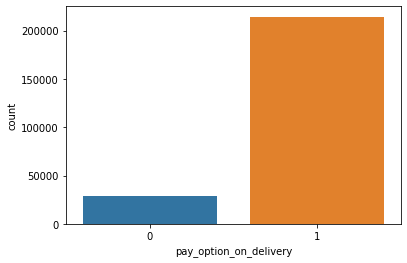

In [35]:
sns.countplot(data=allegro_df_build, x="pay_option_on_delivery")

### pay_option_transfer

In [36]:
allegro_df_build["pay_option_transfer"].value_counts()

1    198402
0     45186
Name: pay_option_transfer, dtype: int64

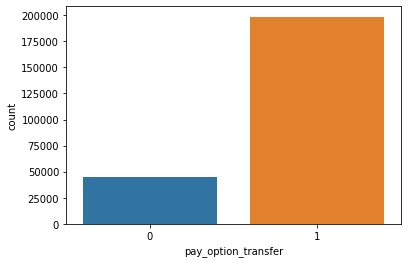

In [37]:
sns.countplot(data=allegro_df_build, x="pay_option_transfer")

### seller

In [38]:
allegro_df_build["seller"].value_counts()

Allegro          666
Aros_pl          518
ezebra_pl        491
sklepogrodnik    470
BENEK195         467
                ... 
Getboxik           1
alfombra11         1
radnar_art         1
c5tetrus           1
juha2-foto         1
Name: seller, Length: 43862, dtype: int64

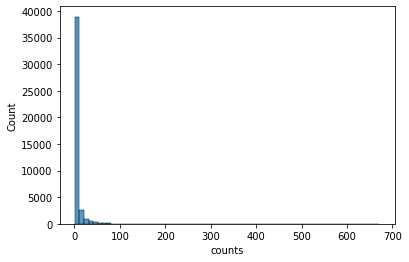

In [39]:
sns.histplot(data=allegro_df_build.groupby(["seller"]).size().reset_index(name="counts"),x="counts", binwidth=10)

In [40]:
df2 = allegro_df_build.groupby(["seller"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False)
df2.loc[df2['counts']<15].__len__()/43862

0.9213670147280105

90% sprzedawców ma poniżej 15 ofert.

### price

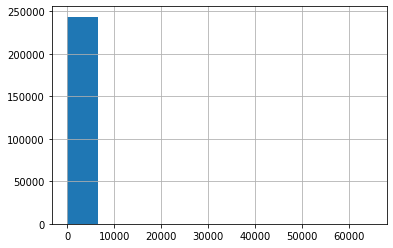

In [41]:
allegro_df_build["price"].hist()

In [ ]:
allegro_df_build["price"].sort_values().value_counts()

1.00        5584
9.99        3068
19.99       2957
99.00       2510
15.00       2447
            ... 
94.43          1
94.48          1
94.49          1
94.61          1
64900.00       1
Name: price, Length: 8554, dtype: int64

In [ ]:
allegro_df_build["price"].eq(0).sum()

22

In [ ]:
allegro_df_build["price"].describe()

count    294014.000000
mean         76.040235
std         313.547677
min           0.000000
25%           9.000000
50%          24.990000
75%          68.000000
max       64900.000000
Name: price, dtype: float64

### it_is_allegro_standard

In [ ]:
allegro_df_build["it_is_allegro_standard"].value_counts()

1    171487
0    122527
Name: it_is_allegro_standard, dtype: int64

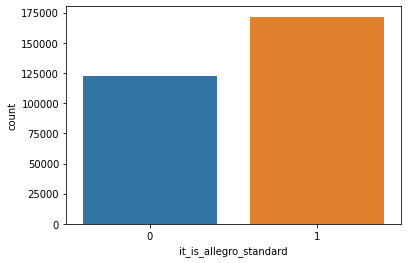

In [ ]:
sns.countplot(data=allegro_df_build, x="it_is_allegro_standard")

### it_quantity

In [ ]:
allegro_df_build["it_quantity"].value_counts()

0        44549
1         7979
2         6048
3         5014
4         4809
         ...  
2795         1
1104         1
10048        1
8904         1
19958        1
Name: it_quantity, Length: 6759, dtype: int64

In [ ]:
allegro_df_build["it_quantity"].describe()

count    294014.000000
mean       6741.857092
std       23374.735062
min           0.000000
25%           6.000000
50%          94.000000
75%         930.000000
max       99999.000000
Name: it_quantity, dtype: float64

In [ ]:
allegro_df_build["it_quantity"].eq(0).sum()

44549

In [ ]:
allegro_df_build["it_quantity"].eq(99999).sum()

246

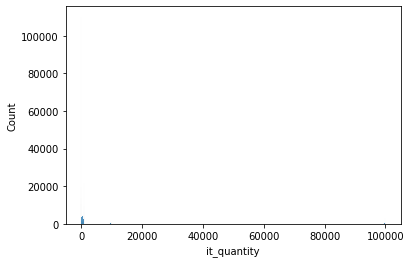

In [ ]:
sns.histplot(allegro_df_build,x='it_quantity')

### it_is_brand_zone

In [ ]:
allegro_df_build["it_is_brand_zone"].value_counts()

0    289102
1      4912
Name: it_is_brand_zone, dtype: int64

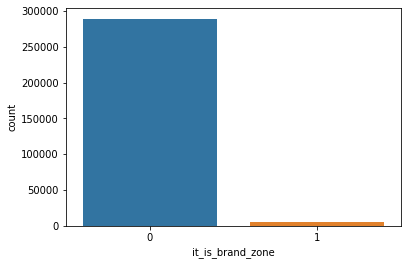

In [ ]:
sns.countplot(data=allegro_df_build, x="it_is_brand_zone")

### it_seller_rating

In [ ]:
allegro_df_build["it_seller_rating"].value_counts()

0         397
1         332
2         235
4         233
3         214
         ... 
153793      1
16071       1
15663       1
133556      1
45692       1
Name: it_seller_rating, Length: 41805, dtype: int64

In [ ]:
allegro_df_build["it_seller_rating"].describe()

count    294014.000000
mean      20395.421779
std       36703.494601
min          -1.000000
25%        1574.000000
50%        6691.000000
75%       20969.000000
max      292074.000000
Name: it_seller_rating, dtype: float64

In [ ]:
allegro_df_build["it_seller_rating"].lt(0).sum()

6

Histogram totalnie nieczytelny dla wszystkich danych. Musimy sporą część obciąć.

1


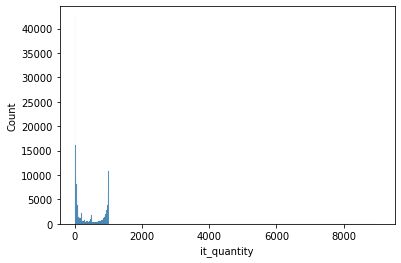

In [ ]:
it_quantities = allegro_df_build['it_quantity']

upper_lim =it_quantities.quantile(.90)
lower_lim =it_quantities.quantile(.00)

data_percentile2 =it_quantities[(it_quantities < upper_lim) & (it_quantities > lower_lim)]
print(data_percentile2.min())
sns.histplot(data=data_percentile2,binwidth=10)

### it_location

In [ ]:
allegro_df_build["it_location"].value_counts()

Warszawa             16271
Kraków               10587
Łódź                  7638
Poznań                7443
Wrocław               5999
                     ...  
Warszawa ŁOMIANKI        1
Gdańsk-Szczecin          1
Lidzbark Welski          1
kargowa                  1
Rzeszów DĘBICA           1
Name: it_location, Length: 8961, dtype: int64

In [ ]:
fake_values1 = '!"#$%&\'()*+.:;<=>?@[\\]^_`{|}~@'
fake_values2 = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ 1234567890'
tmp1 = allegro_df_build["it_location"].map((lambda v: any(char in v for char in fake_values1)))


### main_category

In [ ]:
allegro_df_build["main_category"].value_counts()

Dom i Ogród                            63932
Odzież, Obuwie, Dodatki                37938
Motoryzacja                            32104
Dla Dzieci                             29415
Uroda                                  19619
Sport i Turystyka                      19305
RTV i AGD                              14222
Telefony i Akcesoria                   13883
Komputery                              10179
Zdrowie                                 9202
Książki i Komiksy                       8111
Delikatesy                              5590
Gry                                     5007
Rękodzieło                              4600
Kolekcje                                4307
Przemysł                                4150
Biżuteria i Zegarki                     4066
Biuro i Reklama                         2252
Fotografia                              1620
Muzyka                                  1374
Antyki i Sztuka                          844
Konsole i automaty                       744
Filmy     

## Braki danych

Wstępna analiza jednowymiarowa pokazała nam braki danych w czterech miejscach:
1. Zmienna "price" przyjmuje wartości zerowe.
2. Zmienna "it_quanity" przyjmuje wartości zerowe.
3. Zmienna "it_seller_rating" przyjmuje wartości ujemne.
4. Zmienna "it_location" zawiera dużo błędnych danych (prawdopodobnie użytkownik mógł ustawić tę wartość na dowolny ciąg charów ASCII).

### price

Zmienna "price" przyjmuje w niektórych miejscach wartości zerowe. Jest to dość zastanawiające i problematyczne. Na Allegro nie ma darmowych artykułów. Może to wynikać z tego, że niektóre oferty miały tak naprawdę charakter ogłoszeń (być może przekierowujących do innego serwisu lub zawierające kontakt do sprzedającego).

In [42]:
allegro_df_build["price"].eq(0).sum()

22

Mamy dwadzieścia dwie wartości zerowe w kolumnie "price". Przyjrzyjmy się niektórym z nich.

In [43]:
price_zero = allegro_df_build.loc[allegro_df_build["price"] == 0]
price_zero.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
363166,6095529423,"['Dla Dzieci', 'Odzież', 'Kurtki, płaszcze', '...",0,1,Dajdi83,0.0,0,0,0,4,Gdańsk,Dla Dzieci
243672,6098659857,"['Gry', 'Komputerowe PC', 'Strzelaniny']",0,1,mall94,0.0,0,0,0,29,Warszawa,Gry
417758,6084335204,"['Fotografia', 'Sprzęt optyczny', 'Noktowizory']",1,0,10Perkoz,0.0,0,0,0,150,Inowrocław,Fotografia
218624,6097628433,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery tra...",1,1,rudeczko1,0.0,0,0,0,49,mosty,Dla Dzieci
45669,6096818482,"['Książki i Komiksy', 'Czasopisma', 'Internet,...",1,1,jsandd,0.0,0,0,0,0,Warszawa,Książki i Komiksy


Nic ciekawego z tego nie wynika. Skoro kolumn jest bardzo mała ilość - można je usunąć.

In [5]:
allegro_df_build_fixed = allegro_df_build[allegro_df_build.price != 0]
print(allegro_df_build_fixed.shape)
print(allegro_df_build.shape)
allegro_df_build_fixed.head()

(293992, 14)
(294014, 14)


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka


Postanowiliśmy usunąć te "problematyczne" rzędy. Istnieje jednak oczywiście możliwość, że wystawione przedmioty faktycznie były dostępne za darmo. W takim wypadku nie można uznać tego za brak danych. Nie mają jednak wtedy one żadnej wartości predykcyjnej, jest ich bardzo mało, więc postanowiliśmy je po prostu usunąć. Dlaczego nie wstawiliśmy mediany lub następnej najmniejszej wartości? Postanowiliśmy, że lepiej będzie jej usunąć, ponieważ są to dane wątpliwej wartości - prawdopodobnie niezgodne z regulaminem Allegro (skoro jest ich tak mało w momencie pobrania zbioru, dane z "price" = 0 mogą być szybko usuwane). Jak już wspomnieliśmy wcześniej mogą być to po prostu ogłoszenia, czy inny spam przekierowujący w inne miejsce, który nie został jeszcze zdjęty z serwisu.

### it_quantity

Kolejną problematyczną zmienną jest zmienna "it_quantity". Również zawiera ona zera - jest to conajmniej dziwne. Nie można sprzedać przedmiotu, który nie istnieje.

In [45]:
allegro_df_build["it_quantity"].eq(0).sum()

40870

Mamy bardzo dużo takich rekordów. Oznacza to, że jest to wręcz trend na Allegro. Być może jest to domyślna wartość przy wystawieniu przedmiotu.

In [46]:
allegro_df_build["it_quantity"].eq(99999).sum()

246

 Z kolei 99999 to maksymalna wartość jaką może przyjąć ta zmienna. Może to oznaczać sczapeczkowanie. Nie jest to jednak brak danych.

In [47]:
allegro_df_build["it_quantity"].value_counts()

0        40870
1         7522
2         5757
3         4767
4         4557
         ...  
10284        1
95685        1
1015         1
46246        1
19958        1
Name: it_quantity, Length: 6759, dtype: int64

Mamy kilka ścieżek do wyboru. Możemy te wartości zostawić, możemy zastąpić je modą (następną najpopularniejszą wartością), możemy też użyć średniej. My, biorąc pod uwagę wszystki czynniki, zdecydowaliśmy się zastąpić te zera następną najpopularniejszą wartością, a więc jedynką. Mogłoby się wydawać z autopsji, że serwis Allegro jest zdominowany przez ogłoszenia odnośnie sprzedaży pojedyńczych przedmiotów - zbiór jednak pokazuje coś diametralnie innego. Jeżeli "zero" to domyślna wartość proponowana przez serwis, to całkiem możliwe, że osoby, które nie prowadzą sklepu, chcą po prostu sprzedać pojedynczy przedmiot, po prostu zostawiają to pole puste. Wstawienie więc w miejsce zera kolejnej najpopularniejszej wartości (którą szczęśliwie jest jedynka) ma według nas lepsze uzasadnienie odzwierciedlające rzeczywistość niż wstawienie mediany (która wynosi prawie 7 tysięcy)). Rzędów jest na tyle dużo, że nie ma mowy o ich usunięciu.

In [48]:
#allegro_df_build_fixed2 = allegro_df_build.loc[allegro_df_build["it_quantity"] ==  0]
#allegro_df_build_fixed2 = allegro_df_build
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_quantity"] == 0, "it_quantity"] = 1
allegro_df_build_fixed.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka


In [49]:
allegro_df_build_fixed["it_quantity"].value_counts()

1        48370
2         5757
3         4767
4         4557
9         3571
         ...  
98529        1
9148         1
2402         1
98152        1
19958        1
Name: it_quantity, Length: 6758, dtype: int64

### it_seller_rating

Kolumna "it_seller_rating" zawiera kilka wartości ujemnych.

In [50]:
allegro_df_build["it_seller_rating"].lt(0).sum()

4

Ciężko powiedzieć co to oznacza. Mogą być to konta usunięte, zbanowane, może być też to swojego rodzaju bug. Jest tylko sześć takich ogłoszeń. Nie wiemy jednak co to w ogólnym wypadku oznacza więc najrozsądniej będzie podnieść te problematyczne wartości ujemne do zera. Warto dodać, że wszystki te wartości ujemne to liczby "-1". Być może sensownie byłoby też usunąć rzędy z takimi wartościami (jest ich zaledwie sześć).

In [51]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_seller_rating"].lt(0), "it_seller_rating"] = 0
allegro_df_build_fixed["it_seller_rating"].describe()

count    243566.000000
mean      18779.516049
std       34967.500671
min           0.000000
25%        1439.000000
50%        6062.000000
75%       19355.000000
max      292074.000000
Name: it_seller_rating, dtype: float64

### it_location

Kolumna "it_location" zawiera dużo "śmieciowych" wartości. Użytkownicy prawdopodobnie mogli nadawać tej zmiennej wartości samodzielnie poprzez wpisanie dowolnego ciągu charów ASCII z klawiatury.

In [52]:
(allegro_df_build_fixed.it_location == "Londyn").sum()

20

Trudno oszacować w tym wypadku braki danych. W zbiorze znajdują się również zagraniczne adresy, a nie sposób jest znać wszystkie miasta na świecie. Ciężko jest nam stwiedzić czy "Hjingwan" to przypadkowy ciąg znaków, czy może jakieś miasto w Chinach. Musimy więc przepuszczać każdą wartość, która zawiera litery. Odrzucić natomiast można z całą pewnością puste stringi oraz takie, które zawierają tylko i wyłącznie znaki interpunkcyjne czy same liczby.

In [53]:
allegro_df_build_fixed["it_location_raw"] = allegro_df_build_fixed['it_location'].str.replace('[^\w\s]','')
print((allegro_df_build_fixed.it_location_raw == "").sum())
allegro_df_build_fixed.it_location_raw = allegro_df_build_fixed.it_location_raw.str.replace(' ', '')
print((allegro_df_build_fixed.it_location_raw == "").sum())
allegro_df_build_fixed.it_location_raw = allegro_df_build_fixed.it_location_raw.str.replace('\d+', '')
print((allegro_df_build_fixed.it_location_raw == "").sum())

1280
1283
1291


Mamy 1392 wiersze, w których znajdują się jedynie znaki interpunkcyjne i liczby. Możemy je usunąć.

In [54]:
print(allegro_df_build_fixed.shape)
allegro_df_build_fixed = allegro_df_build_fixed[allegro_df_build_fixed.it_location_raw != ""]
print(allegro_df_build_fixed.shape)

(243566, 13)
(242275, 13)


## Przekształcenie zmiennych ciągłych na kategoryczne

### Zakodowanie zmiennej celu

Robimy to dzieląć na 3 części funkcją pd.qcut.

In [46]:
allegro_df_build_fixed['priceEncoded']=pd.qcut(allegro_df_build_fixed['price'], q=3,labels=False)
allegro_df_build_fixed.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,it_location,main_category,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded,it_quantityEncoded,it_seller_ratingEncoded,priceEncoded
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,...,1,Kolekcje,Birofilistyka,11.99,0,5.000,0,0,0,0
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,...,3,Uroda,Kosmetyki pielęgnacyjne,15.49,0,19.600,1,0,2,1
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,...,1,Kolekcje,Modelarstwo,11.99,0,20.000,1,3,3,0
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,...,1,Biuro i Reklama,Artykuły piśmiennicze,11.80,0,5.725,0,3,1,0
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,...,1,Muzyka,Płyty kompaktowe,29.00,2,27.990,2,0,0,1
194622,194622,2016-04-03 17:33:05,6001070212,"['Motoryzacja', 'Opony', 'Opony samochodowe', ...",1,1,wwwAUTO-RADpl,880.00,1,8,...,3,Motoryzacja,Opony,37.36,3,483.000,4,1,2,2
117505,117505,2016-04-03 21:12:41,5687634664,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,MR-SPORT,117.99,0,210,...,1,"Odzież, Obuwie, Dodatki",Odzież i bielizna męska,42.90,4,47.000,4,2,4,2
406589,406589,2016-04-03 15:12:34,5817896705,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Fol...",1,1,EKLIK_PL,19.99,1,986,...,1,Telefony i Akcesoria,Akcesoria GSM,19.73,1,16.500,1,4,3,1
98405,98405,2016-04-03 14:44:13,5955730489,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Akcesor...",1,0,sklep_dbamobuty,4.90,0,474,...,3,"Odzież, Obuwie, Dodatki",Obuwie,42.90,4,99.000,4,3,1,0
27867,27867,2016-04-03 18:55:11,6069971182,"['Książki i Komiksy', 'Poradniki i albumy', 'P...",1,1,korob_pl,19.99,1,51,...,5,Książki i Komiksy,Poradniki i albumy,19.00,1,21.900,2,2,4,1


### Zakodowanie it_seller_rating i it_quantity

W analogiczny sposób. Możemy podzielić na więcej kwantyli.

In [45]:
allegro_df_build_fixed['it_quantityEncoded']=pd.qcut(allegro_df_build_fixed['it_quantity'], q=5,labels=False)
allegro_df_build_fixed['it_seller_ratingEncoded']=pd.qcut(allegro_df_build_fixed['it_seller_rating'], q=5,labels=False)

In [59]:
allegro_df_build_fixed

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_raw,priceEncoded,it_quantityEncoded,it_seller_ratingEncoded
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje,Miastko,0,0,0
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda,Warszawa,1,0,2
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Krosno,0,4,3
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Głuchołazy,0,4,1
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka,Tarnów,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,WSCHOWA,Dom i Ogród,WSCHOWA,0,1,0
19298,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,1,0,947,Międzyrzec Podlaski,Fotografia,MiędzyrzecPodlaski,2,0,0
6633,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,Łódź,Komputery,Łódź,2,4,4
59636,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,1,0,513,Cała Polska,Przemysł,CałaPolska,0,0,0


## Zakodowanie zmiennych kategorycznych

### main_category i categories

main_category to poprostu pierwsza wartość z ciągu kategorii z kolumny categories. Możemy zejść do drugiego poziomu i zakodować Binary Encodem nazwę drugiej kategorii. Stosując inne podjeście moglibyśmy zejść jeszcze niżej i np. zastępować nazwę kategorii medianą lub średnią ceną w danej kategorii, potem podzielić jak zmienną celu lub na więcej kategorii. I tak i tak musimy zacząć od utworzenia list danych poziomów kategorii. Problem nastąpi przy schodzniu niżej niż dwie kategorie, ponieważ najkrótsze listy kategorii są długości 2. Inny problem pojawiłby się przy takim podejściu gdyby w danych testowych pojawiły się nowe kategorie. Dodatkowo jest wiele kategorii w których jest tylko jedna oferta. Plusem zakodowania jako średnia cena jest połączenie kategorii w podobne grupy cenowe.

Main_category możemy zakodować jako średnia cena tej kategorii.

In [9]:
import ast
mainCategories = []
Categories2 = []
for cat in allegro_df_build_fixed['categories']:
    listka = ast.literal_eval(cat)
    mainCategories.append(listka[0])
    Categories2.append(listka[1])

In [22]:
allegro_df_build_fixed['second_categoryy'] = Categories2

In [16]:
pd.Series(Categories2).unique().__len__()

263

In [23]:
allegro_df_build_fixed.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje,Birofilistyka,11.99,0,5.000,0
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda,Kosmetyki pielęgnacyjne,15.49,0,19.600,1
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Modelarstwo,11.99,0,20.000,1
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Artykuły piśmiennicze,11.80,0,5.725,0
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka,Płyty kompaktowe,29.00,2,27.990,2


In [24]:
median_encode = allegro_df_build_fixed.groupby('main_category')['price'].median()
allegro_df_build_fixed.loc[:,'main_categoryMedian'] = allegro_df_build_fixed['main_category'].map(median_encode)
allegro_df_build_fixed['main_categoryEncoded']=pd.qcut(allegro_df_build_fixed['main_categoryMedian'], q=5,labels=False)

In [25]:
median_encode2 = allegro_df_build_fixed.groupby('second_categoryy')['price'].median()
allegro_df_build_fixed.loc[:,'second_categoryMedian'] = allegro_df_build_fixed['second_categoryy'].map(median_encode2)
allegro_df_build_fixed['second_categoryEncoded']=pd.qcut(allegro_df_build_fixed['second_categoryMedian'], q=5,labels=False)

In [26]:
allegro_df_build_fixed

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje,Birofilistyka,11.99,0,5.000,0
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda,Kosmetyki pielęgnacyjne,15.49,0,19.600,1
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Modelarstwo,11.99,0,20.000,1
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Artykuły piśmiennicze,11.80,0,5.725,0
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka,Płyty kompaktowe,29.00,2,27.990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,47298,2016-04-03 13:30:41,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,WSCHOWA,Dom i Ogród,Ogród,18.00,0,12.000,0
19298,19298,2016-04-03 20:10:45,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,0,0,947,Międzyrzec Podlaski,Fotografia,Obiektywy,29.00,2,425.000,4
6633,6633,2016-04-03 11:21:11,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,Łódź,Komputery,Części do laptopów,33.99,3,49.000,4
59636,59636,2016-04-03 20:16:53,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,0,0,513,Cała Polska,Przemysł,Materiały i akcesoria,18.00,0,14.000,1


### seller

In [67]:
allegro_df_build_fixed.groupby(["seller"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)

,seller,counts
1650,Allegro,666
1968,Aros_pl,518
24273,ezebra_pl,491
38285,sklepogrodnik,470
2343,BENEK195,467
21752,darmarsklep,462
28858,kosmetyki_ck,381
33088,motostacja_pl,380
28820,korob_pl,340
14176,Swip_2009,339


Napewno nie musimy każdego sprzedawcy zakodowaywać unikalnymi wartościami. Największy sprzedawca ma około blisko 500 ofert. Jednocześnie większość sprzedawców ma bardzo mało ofert. Ci więksi to mogą być sklepy z różnymi produktami. Wydaję się, że to słaba zmienna. Raczej nie ma dużego wpływu na model. Znów moglibyśmy zakodować sprzedawce jako średnia cena jego produktów. Jednak może dojść dużo nowych sprzedawców i nie będzie wiadomo jak je zakodować. Nie bierzemy tej zmiennej pod uwagę w modelu.

### It_location

Zacznijmy od małego preprocessingu. Pogrupujmy nazwy ozanaczające de facto to samo do jednej kategorii.

In [27]:
allegro_df_build_fixed["it_location"].value_counts().index.tolist()[:30]

['Warszawa',
 'Kraków',
 'Łódź',
 'Poznań',
 'Wrocław',
 'Białystok',
 'Lublin',
 'Rzeszów',
 'Kielce',
 'Częstochowa',
 'Internet',
 'Gdańsk',
 'INTERNET',
 'Szczecin',
 'Katowice',
 'Bydgoszcz',
 'Koszalin',
 'Zielona Góra',
 'Gdynia',
 'WARSZAWA',
 'internet',
 'Dębica',
 'Bielsko-Biała',
 'Cała Polska',
 'Radom',
 'Polska',
 'Toruń',
 'Chrzypsko Wielkie',
 'Tarnowskie Góry',
 'kobylnica']

In [28]:
allegro_df_build_fixed["it_location"].value_counts().values.tolist()[:30]

[16268,
 10587,
 7638,
 7443,
 5996,
 5069,
 4654,
 4246,
 4077,
 3982,
 3145,
 2824,
 2814,
 2744,
 2589,
 2578,
 2265,
 2154,
 2004,
 1885,
 1779,
 1719,
 1567,
 1562,
 1455,
 1450,
 1411,
 1358,
 1313,
 1301]

"WARSZAWA" oznacza to samo co "Warszawa". Wrzućmy tego typu rekordy do jednej kategorii. Postąpmy podobnie dla czterech kolejnych (nie licząc Warszawy) najpopularniejszych wartości zmiennej.

In [29]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'warszawa' in x.lower())]

,it_location,count
0,Warszawa,16268
19,WARSZAWA,1885
47,warszawa,800
187,Warszawa/ Sprzedaż tylko wysyłkowa,227
392,"Warszawa, Katowice",108
...,...,...
8670,Siedlce Warszawa Serock Otwock,1
8717,Skierniewice Warszawa Łódź,1
8765,"JANKI,Warszawa",1
8777,"JABŁONNA,WROCŁAW,WARSZAWA",1


Cztery najpopularniejsze tutaj wartości wyglądają na to samo. Inne mają niekiedy podane kilka miast lub wsie pod Warszawą, więc lepiej nic z nimi nie robić. Oczywiście rozwiązanie zaprezentowane tutaj to tak zwane "szybkie rozwiązanie". Gdyby mielibyśmy większy zasób czasowy to prawdopodobnie pobralibyśmy ramkę danych z miastami i ich wielkościami i pogrupowalibyśmy po wielkości miejsca zamieszkania.

In [30]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WARSZAWA", "it_location"] = "Warszawa"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "warszawa", "it_location"] = "Warszawa"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Warszawa/ Sprzedaż tylko wysyłkowa", "it_location"] = "Warszawa"

In [31]:
allegro_df_build_fixed["it_location"].value_counts()

Warszawa                             19180
Kraków                               10587
Łódź                                  7638
Poznań                                7443
Wrocław                               5996
                                     ...  
WARSZAWA Janki                           1
Pępice                                   1
Gdańsk Sopot Elbląg Tczew Malbork        1
Kamińsk                                  1
Rzeszów DĘBICA                           1
Name: it_location, Length: 8956, dtype: int64

In [32]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'kraków' in x.lower())]

,it_location,count
1,Kraków,10587
41,KRAKÓW,867
250,kraków,176
348,Kraków Łódź,122
367,Kraków al. Słowackiego 40/1,115
...,...,...
8724,"KRAKÓW, Tatarska 5 / #4T0500",1
8802,Trzebinia Chrzanów Kraków,1
8817,Tenczynek/Kraków,1
8869,"Szczecin, Kraków, Poznań, Katowice",1


In [33]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "KRAKÓW", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "kraków", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Kraków al. Słowackiego 40/1", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Krakow", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "krakow", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "KRAKOW", "it_location"] = "Kraków"

In [34]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'łódź' in x.lower())]

,it_location,count
2,Łódź,7638
39,ŁÓDŹ,954
345,Kraków Łódź,122
421,łódź,102
593,"Tomaszów Mazowiecki, Łódź",66
...,...,...
8590,"Stare Krasnodęby, Łódź",1
8597,KATOWICE KRAKÓW WROCŁAW TARNÓW ŁÓDŹ,1
8668,Skierniewice Warszawa Łódź,1
8876,Jeżów / Łódź,1


In [35]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "ŁÓDŹ", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "łódź", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "lodz", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Lodz", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "LODZ", "it_location"] = "Łódź"

In [36]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'poznań' in x.lower())]

,it_location,count
3,Poznań,7443
120,POZNAŃ,317
518,poznań,81
663,Poznań-Skórzewo,59
969,"Poznań, ul. Obornicka 337",36
...,...,...
8833,"Szczecin, Kraków, Poznań, Katowice",1
8858,Szczecin Sopot Poznań Katowice,1
8871,Stróżewo Chodzież Poznań,1
8879,Suchy Las (k. Poznań),1


In [37]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "POZNAŃ", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "poznan", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Poznan", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "poznań", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Poznań, ul. Obornicka 337", "it_location"] = "Poznań"

In [38]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'wrocław' in x.lower())]

,it_location,count
4,Wrocław,5996
59,WROCŁAW,605
99,Inowrocław,383
203,wrocław,202
418,Czernica koło Wrocławia,101
...,...,...
8579,KATOWICE KRAKÓW WROCŁAW TARNÓW ŁÓDŹ,1
8591,Stargard Wrocław Warszawa,1
8618,"Sieradz, Wrocław",1
8751,"JABŁONNA,WROCŁAW,WARSZAWA",1


In [39]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WROCŁAW", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "wrocław", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "wroclaw", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Wroclaw", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WROCLAW", "it_location"] = "Wrocław"

In [40]:
allegro_df_build_fixed["it_location"].value_counts()

Warszawa             19180
Kraków               12004
Łódź                  8760
Poznań                8034
Wrocław               6965
                     ...  
Warszawa ŁOMIANKI        1
Gdańsk-Szczecin          1
Lidzbark Welski          1
kargowa                  1
Rzeszów DĘBICA           1
Name: it_location, Length: 8935, dtype: int64

In [41]:
allegro_df_build_fixed.loc[~allegro_df_build_fixed.it_location.isin(["Warszawa", "Wrocław", "Łódź", "Kraków", "Poznań"]), "it_location"] = "Other"

Jakby było więcej czasu, uogólnilibyśmy ten algorytm, żeby możliwie dla wszystkich miast tworzył poprawne nazwy.

In [42]:
allegro_df_build_fixed["it_location"].value_counts()

Other       239049
Warszawa     19180
Kraków       12004
Łódź          8760
Poznań        8034
Wrocław       6965
Name: it_location, dtype: int64

Zakodowanie label encoderem

In [43]:
! pip install category_encoders 
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [44]:
allegro_df_build_fixed['it_location'] = LabelEncoder().fit_transform(allegro_df_build_fixed.it_location)
allegro_df_build_fixed

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,1,Kolekcje,Birofilistyka,11.99,0,5.000,0
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,3,Uroda,Kosmetyki pielęgnacyjne,15.49,0,19.600,1
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,1,Kolekcje,Modelarstwo,11.99,0,20.000,1
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,1,Biuro i Reklama,Artykuły piśmiennicze,11.80,0,5.725,0
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,1,Muzyka,Płyty kompaktowe,29.00,2,27.990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,47298,2016-04-03 13:30:41,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,1,Dom i Ogród,Ogród,18.00,0,12.000,0
19298,19298,2016-04-03 20:10:45,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,0,0,947,1,Fotografia,Obiektywy,29.00,2,425.000,4
6633,6633,2016-04-03 11:21:11,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,5,Komputery,Części do laptopów,33.99,3,49.000,4
59636,59636,2016-04-03 20:16:53,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,0,0,513,1,Przemysł,Materiały i akcesoria,18.00,0,14.000,1


## Ramka danych do modelu.

In [47]:
allegro_df_build_fixed.columns

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category', 'second_categoryy', 'main_categoryMedian',
       'main_categoryEncoded', 'second_categoryMedian',
       'second_categoryEncoded', 'it_quantityEncoded',
       'it_seller_ratingEncoded', 'priceEncoded'],
      dtype='object')

In [52]:
allegro_df_build_fixed.loc[:,['pay_option_on_delivery','pay_option_transfer','it_is_allegro_standard','it_is_brand_zone','main_categoryEncoded','second_categoryEncoded', 'it_quantityEncoded',
       'it_seller_ratingEncoded','it_location', 'priceEncoded']]

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_is_brand_zone,main_categoryEncoded,second_categoryEncoded,it_quantityEncoded,it_seller_ratingEncoded,it_location,priceEncoded
180801,0,1,0,0,0,0,0,0,1,0
169056,1,1,1,0,0,1,0,2,3,1
168488,1,1,0,0,0,1,3,3,1,0
59047,1,1,0,0,0,0,3,1,1,0
69298,0,1,0,0,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
47298,1,1,0,0,0,0,1,0,1,0
19298,1,1,1,0,2,4,0,0,1,2
6633,1,1,1,0,3,4,4,4,5,2
59636,1,1,0,0,0,1,0,0,1,0
